In [1]:
import pandas as pd

#load info
team_season = pd.read_csv(r"/content/team_season.csv")
team_season.head()

,team,year,leag,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_3pm,o_3pa,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace,won,lost
0,BOS,1946,N,1397,5133,811,1375,0,0,0,470,1202,0,0,0,0,0,3605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3900,0.0,22,38
1,CH1,1946,N,1879,6309,939,1550,0,0,0,436,1473,0,0,0,0,0,4697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4471,0.0,39,22
2,CL1,1946,N,1674,5699,903,1428,0,0,0,494,1246,0,0,0,0,0,4251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4308,0.0,30,30
3,DE1,1946,N,1437,5843,923,1494,0,0,0,482,1351,0,0,0,0,0,3797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3918,0.0,20,40
4,NYK,1946,N,1465,5255,951,1438,0,0,0,457,1218,0,0,0,0,0,3881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3840,0.0,33,27


In [2]:
Y = []
for value in team_season.values:
    won = value[34]
    lost = value[35]
    Y.append(float(won / (won + lost)))
print(len(Y))

1187


In [3]:
print(Y)

[0.36666666666666664, 0.639344262295082, 0.5, 0.3333333333333333, 0.55, 0.5833333333333334, 0.25, 0.4666666666666667, 0.6229508196721312, 0.36666666666666664, 0.8166666666666667, 0.5833333333333334, 0.4166666666666667, 0.5833333333333334, 0.5416666666666666, 0.5625, 0.125, 0.6041666666666666, 0.5833333333333334, 0.48333333333333334, 0.4166666666666667, 0.6333333333333333, 0.36666666666666664, 0.3, 0.7333333333333333, 0.5333333333333333, 0.4666666666666667, 0.2, 0.75, 0.48333333333333334, 0.6333333333333333, 0.578125, 0.36764705882352944, 0.3235294117647059, 0.5882352941176471, 0.1774193548387097, 0.5882352941176471, 0.609375, 0.75, 0.5882352941176471, 0.38235294117647056, 0.75, 0.3548387096774194, 0.38235294117647056, 0.796875, 0.453125, 0.3064516129032258, 0.47058823529411764, 0.36363636363636365, 0.5652173913043478, 0.47058823529411764, 0.45588235294117646, 0.6470588235294118, 0.5454545454545454, 0.6060606060606061, 0.6029411764705882, 0.48484848484848486, 0.36764705882352944, 0.2857

In [4]:
import copy

team_season_dropped = copy.deepcopy(team_season)
team_season_dropped.drop(team_season_dropped.columns[[0, 1, 2, 34, 35]], axis=1, inplace=True)
team_season_dropped.head()

,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,o_asts,o_pf,o_stl,o_to,o_blk,o_3pm,o_3pa,o_pts,d_fgm,d_fga,d_ftm,d_fta,d_oreb,d_dreb,d_reb,d_asts,d_pf,d_stl,d_to,d_blk,d_3pm,d_3pa,d_pts,pace
0,1397,5133,811,1375,0,0,0,470,1202,0,0,0,0,0,3605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3900,0.0
1,1879,6309,939,1550,0,0,0,436,1473,0,0,0,0,0,4697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4471,0.0
2,1674,5699,903,1428,0,0,0,494,1246,0,0,0,0,0,4251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4308,0.0
3,1437,5843,923,1494,0,0,0,482,1351,0,0,0,0,0,3797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3918,0.0
4,1465,5255,951,1438,0,0,0,457,1218,0,0,0,0,0,3881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3840,0.0


In [5]:
print(len(team_season_dropped) == len(Y))

True


In [6]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(team_season_dropped)

In [7]:
print(X[1])

[-2.25879253 -0.76226965 -2.57911991 -1.90160805 -1.39919916 -1.4238284
 -3.64340751 -3.90768748 -1.75614316 -1.39490271 -1.38999949 -1.3489673
 -0.87529308 -0.40245799 -2.6678785  -1.90848527 -1.92788372 -1.87532842
 -1.87783404 -1.40722085 -1.42288148 -1.9175295  -1.89454811 -1.92587031
 -1.405453   -1.38708193 -1.3863296  -0.92540501 -0.41297301 -2.83857972
 -1.43668687]


In [8]:
print(Y[1])

0.639344262295082


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [10]:
x = X
y = Y
y = np.reshape(y, (-1, 1))
scalar_x = MinMaxScaler()
scalar_y = MinMaxScaler()
print(scalar_x.fit(x))
xscale = scalar_x.transform(x)
print(scalar_y.fit(y))
yscale = scalar_y.transform(y)

MinMaxScaler()
MinMaxScaler()


In [11]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [12]:
model = Sequential()
model.add(Dense(31, input_dim=31, kernel_initializer='normal', activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 31)                992       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4096      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 38,241
Trainable params: 38,241
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [14]:
history = model.fit(X_train, y_train, epochs=250, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/250
15/15 [==============================] - 3s 22ms/step - loss: 0.1013 - mse: 0.1013 - mae: 0.2534 - val_loss: 0.0481 - val_mse: 0.0481 - val_mae: 0.1899
Epoch 2/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0476 - mse: 0.0476 - mae: 0.1791 - val_loss: 0.0386 - val_mse: 0.0386 - val_mae: 0.1632
Epoch 3/250
15/15 [==============================] - 0s 6ms/step - loss: 0.0398 - mse: 0.0398 - mae: 0.1607 - val_loss: 0.0409 - val_mse: 0.0409 - val_mae: 0.1600
Epoch 4/250
15/15 [==============================] - 0s 7ms/step - loss: 0.0402 - mse: 0.0402 - mae: 0.1645 - val_loss: 0.0353 - val_mse: 0.0353 - val_mae: 0.1537
Epoch 5/250
15/15 [==============================] - 0s 6ms/step - loss: 0.0362 - mse: 0.0362 - mae: 0.1553 - val_loss: 0.0381 - val_mse: 0.0381 - val_mae: 0.1549
Epoch 6/250
15/15 [==============================] - 0s 6ms/step - loss: 0.0351 - mse: 0.0351 - mae: 0.1526 - val_loss: 0.0357 - val_mse: 0.0357 - val_mae: 0.1512
Epoch 7/250
15/15 [==

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


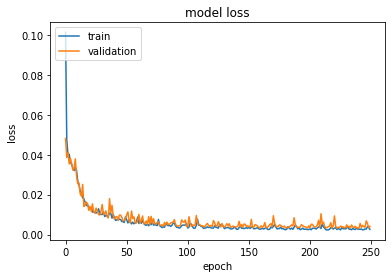

In [15]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


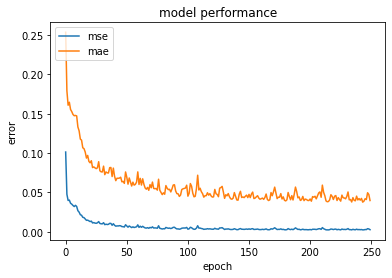

In [16]:
print(history.history.keys())
plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.title('model performance')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend(['mse', 'mae'], loc='upper left')
plt.show()


In [17]:
X_new = np.array([[-2.2578408616907195, -0.7619484936348196, -2.5780332793928573,
                  -1.9008068681873072, -1.3986096481100645, -1.42322851369181, -3.6418724785872727,
                  -3.9060410970576713, -1.7554032607606425, -1.3943150129620527, -1.3894138552044868,
                  -1.3483989533215142, -0.8749243064663377, -0.4022884310098427, -2.6667544718571463,
                  -1.907681185475232, -1.9270714623297287, -1.8745383118848733,
                  -1.8770428706065658, -1.4066279663766306, -1.4222819925666383, -1.9167216073576925,
                  -1.8937499044421475, -1.925058900708228, -1.4048608587821392, -1.3864975278692442,
                  -1.3857455114766448, -0.925015121858419, -0.4127990174344398, -2.8373837683558767,
                  -1.4360815700998038]])
X_new = scalar_x.transform(X_new)
y_new = model.predict(X_new)
#invert normalize
y_new = scalar_y.inverse_transform(y_new)
X_new = scalar_x.inverse_transform(X_new)
print("X=%s, Predicted=%s" % (X_new[0], y_new[0]))
nn_predictions = []
for value in X:
    X_new = np.array([value])
    X_new = scalar_x.transform(X_new)
    y_new = model.predict(X_new)
    #invert normalize
    y_new = scalar_y.inverse_transform(y_new)
    X_new = scalar_x.inverse_transform(X_new)
    nn_predictions.append(y_new[0])

X=[-2.25784086 -0.76194849 -2.57803328 -1.90080687 -1.39860965 -1.42322851
 -3.64187248 -3.9060411  -1.75540326 -1.39431501 -1.38941386 -1.34839895
 -0.87492431 -0.40228843 -2.66675447 -1.90768119 -1.92707146 -1.87453831
 -1.87704287 -1.40662797 -1.42228199 -1.91672161 -1.8937499  -1.9250589
 -1.40486086 -1.38649753 -1.38574551 -0.92501512 -0.41279902 -2.83738377
 -1.43608157], Predicted=[0.6313095]


In [18]:
team_arr = (team_season.team == "BOS").values

In [19]:
year_arr = (team_season.year == int("1946")).values

In [20]:
count = 0
index = -1
for value in team_arr:
    if team_arr[count]:
        if year_arr[count]:
            index = count
    count = count + 1
print(index)

0


In [21]:
X = StandardScaler().fit_transform(team_season_dropped)

In [24]:
team_season_dropped = X
print(X[index].tolist())

[-3.0965134852746914, -1.9924140292745167, -3.003851013800846, -2.345001825632069, -1.399199156944721, -1.4238283992879754, -3.6434075144735982, -3.8129324104116877, -2.8369461426683933, -1.3949027116237493, -1.3899994880461737, -1.3489672985325565, -0.875293083851087, -0.4024579941073652, -3.4914856553243525, -1.9084852660949108, -1.92788371587995, -1.875328422904946, -1.877834037288948, -1.4072208549030147, -1.4228814792076179, -1.9175294984820261, -1.8945481130779862, -1.9258703059711113, -1.4054530024791527, -1.3870819314896607, -1.3863295981249126, -0.9254050123380538, -0.4129730107055733, -3.269244828883868, -1.4366868732120759]


In [25]:
#save neural network here
model.save('NNpredictionModel.h5')

In [27]:
X_new = np.array([team_season_dropped[index].tolist()])
X_new = scalar_x.transform(X_new)
y_new = model.predict(X_new)
#invert normalize
y_new = scalar_y.inverse_transform(y_new)
X_new = scalar_x.inverse_transform(X_new)
print("X=%s, Predicted=%s" % (X_new[0], y_new[0]))

X=[-3.09651349 -1.99241403 -3.00385101 -2.34500183 -1.39919916 -1.4238284
 -3.64340751 -3.81293241 -2.83694614 -1.39490271 -1.38999949 -1.3489673
 -0.87529308 -0.40245799 -3.49148566 -1.90848527 -1.92788372 -1.87532842
 -1.87783404 -1.40722085 -1.42288148 -1.9175295  -1.89454811 -1.92587031
 -1.405453   -1.38708193 -1.3863296  -0.92540501 -0.41297301 -3.26924483
 -1.43668687], Predicted=[0.32318163]


In [34]:
neural_Network_Results = []
for value in team_season_dropped:
    X_new = np.array([value.tolist()])
    X_new = scalar_x.transform(X_new)
    y_new = model.predict(X_new)
    #invert normalize
    y_new = scalar_y.inverse_transform(y_new)
    X_new = scalar_x.inverse_transform(X_new)
    neural_Network_Results.append(y_new[0])

In [35]:
print(len(neural_Network_Results))

1187


In [36]:
from sklearn import linear_model

X = X
y = Y
lm = linear_model.LinearRegression()
lin_model = lm.fit(X, y)
multi_lin_predictions = lin_model.predict(X)
print(multi_lin_predictions)


[0.36881834 0.58872271 0.46709683 ... 0.45662928 0.34614944 0.49810837]


In [37]:
from math import exp

print("Enter the first team's name: ")
team_1_name = input() #input from user
print("Enter the year for the first team: ")
year_1 = input() # input from user

print("Enter the second team's name: ")
team_2_name =  input() #input from user
print("Enter the year for the second team: ")
year_2 = input() # input from user



Enter the first team's name: 
bos
Enter the year for the first team: 
1946
Enter the second team's name: 
ch1
Enter the year for the second team: 
1946


In [40]:
def getSquareRoot():
    team_arr = (team_season.team == str(team_1_name).upper())
    year_arr = (team_season.year == int(year_1)).values

    count = 0
    index = -1
    for _ in team_arr:
        if team_arr[count]:
            if year_arr[count]:
                index = count
        count += 1


    print(index)
    print(team_season_dropped[index].tolist())

    X_new = np.array([team_season_dropped[index].tolist()])
    LM_X = X_new
    X_new = scalar_x.transform(X_new)

    y_new = model.predict(X_new)
    #invert normalize
    y_new = scalar_y.inverse_transform(y_new)
    X_new = scalar_x.inverse_transform(X_new)
    print("X=%s, Predicted=%s" % (X_new[0], y_new[0]))

    team2_arr = (team_season.team == str(team_2_name).upper()).values

    year2_arr = (team_season.year == int(year_2)).values

    count = 0
    index2 = -1
    for _ in team2_arr:
      if team2_arr[count]:
        if year2_arr[count]:
            index2 = count
      count += 1
    print(index2)
    print(team_season_dropped[index2].tolist())

    X_new2 = np.array([team_season_dropped[index2].tolist()])
    LMX_2 = X_new2
    X_new2 = scalar_x.transform(X_new2)
    y_new2 = model.predict(X_new2)
    #invert normalize
    y_new2 = scalar_y.inverse_transform(y_new2)
    X_new2 = scalar_x.inverse_transform(X_new2)
    print("X=%s, Predicted=%s" % (X_new2[0], y_new2[0]))

    prob1 = exp(float(y_new[0][0])) / (exp(float(y_new[0][0])) + exp(float(y_new2[0][0])))
    print(prob1)

    prob2 = exp(float(y_new2[0][0])) / (exp(float(y_new[0][0])) + exp(float(y_new2[0][0])))
    print(prob2)

    print('For the Neural Network...')
    print('The normalized probability for team one winning is: ' + str(prob1))
    print('The normalized probability for team two winning is: ' + str(prob2))

    print("LM prediction is" + str(multi_lin_predictions[index]))

    LM_Pred_1 = float(multi_lin_predictions[index])
    LM_Pred_2 = float(multi_lin_predictions[index2])

    normalized_LM_1 = exp(LM_Pred_1) / (exp(LM_Pred_1) + exp(LM_Pred_2))
    print(normalized_LM_1 )

    normalized_LM_2 = exp(LM_Pred_2) / (exp(LM_Pred_1) + exp(LM_Pred_2))
    print(normalized_LM_2 )

    print('For the Multiple Linear Regression Model... ')

    print('The normalized probability for team one winning is: '+str(normalized_LM_1))
    print('The normalized probability for team two winning is: '+str(normalized_LM_2))


    final_team1 = prob1 + normalized_LM_1
    final_team2 = prob2 + normalized_LM_2

    Final_normalized_LM_1 = exp(final_team1) / (exp(final_team1) + exp(final_team2))
    print(normalized_LM_1 )

    Final_normalized_LM_2 = exp(final_team2) / (exp(final_team1) + exp(final_team2))
    print(normalized_LM_2 )


    print('For the Ensemble of Both Models...')

    print('The normalized probability for team one winning is: '+str(Final_normalized_LM_1))

    print('The normalized probability for team two winning is: ' + str(Final_normalized_LM_2))


    winner = ""
    if float(Final_normalized_LM_1)>float(Final_normalized_LM_2):
        winner = "The Ensemble result shows that team 1 wins!"
    elif float(Final_normalized_LM_2) > float(Final_normalized_LM_1):
        winner = "The Ensemble result shows that team 2 wins!"

    print(winner)


In [41]:
getSquareRoot()

0
[-3.0965134852746914, -1.9924140292745167, -3.003851013800846, -2.345001825632069, -1.399199156944721, -1.4238283992879754, -3.6434075144735982, -3.8129324104116877, -2.8369461426683933, -1.3949027116237493, -1.3899994880461737, -1.3489672985325565, -0.875293083851087, -0.4024579941073652, -3.4914856553243525, -1.9084852660949108, -1.92788371587995, -1.875328422904946, -1.877834037288948, -1.4072208549030147, -1.4228814792076179, -1.9175294984820261, -1.8945481130779862, -1.9258703059711113, -1.4054530024791527, -1.3870819314896607, -1.3863295981249126, -0.9254050123380538, -0.4129730107055733, -3.269244828883868, -1.4366868732120759]
X=[-3.09651349 -1.99241403 -3.00385101 -2.34500183 -1.39919916 -1.4238284
 -3.64340751 -3.81293241 -2.83694614 -1.39490271 -1.38999949 -1.3489673
 -0.87529308 -0.40245799 -3.49148566 -1.90848527 -1.92788372 -1.87532842
 -1.87783404 -1.40722085 -1.42288148 -1.9175295  -1.89454811 -1.92587031
 -1.405453   -1.38708193 -1.3863296  -0.92540501 -0.41297301 -3

In [42]:
from sklearn import linear_model
y = Y
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
multi_lin_predictions = lm.predict(X)
print(multi_lin_predictions[1])

0.5887227079851802


In [43]:
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X, y)
predicted_values = []
count = 0
for i in X:
 lin_predicted_prob = lin_regr.predict([i])
 predicted_values.append(lin_predicted_prob)

In [44]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
x = StandardScaler().fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
from sklearn import linear_model
x = principalDf
y = Y
lin_regr = linear_model.LinearRegression()
lin_regr.fit(x.values, y)
simple_LM = []
count = 0
for i in x.values:
 lin_predicted_prob = lin_regr.predict([i])
 simple_LM.append(lin_predicted_prob)

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mseSLR = mean_squared_error(np.array(simple_LM), y)
mseMLR = mean_squared_error(np.array(multi_lin_predictions), y)
mseNN = mean_squared_error(np.array(neural_Network_Results), y)
maeSLR = mean_absolute_error(np.array(simple_LM), y)
maeMLR = mean_absolute_error(np.array(multi_lin_predictions), y)
maeNN = mean_absolute_error(np.array(neural_Network_Results), y)
print("The Mean Squared Error for the Simple Linear Regression model is ",mseSLR)
print("The Mean Absolute Error for the Simple Linear Regression model is ",maeSLR)
print("The variance for the Simple Linear Prediction Model is ",np.var(simple_LM))
print("\nThe Mean Squared Error for the Multiple Linear Regression model is ",mseMLR)
print("The Mean Absolute Error for the Multiple Linear Regression model is ",maeMLR)
print("The variance for the Multiple Linear Prediction Model is ",np.var(multi_lin_predictions))
print("\nThe Mean Squared Error for the Probabilistic Regression Neural Network is ",mseNN)
print("The Mean Absolute Error for the Probabilistic Regression Neural Network is ",maeNN)
print("The variance for the Probabilistic Regression Neural Network is ",np.var(neural_Network_Results))


The Mean Squared Error for the Simple Linear Regression model is  0.022158138051408295
The Mean Absolute Error for the Simple Linear Regression model is  0.12193389814976235
The variance for the Simple Linear Prediction Model is  6.0021970785201535e-05

The Mean Squared Error for the Multiple Linear Regression model is  0.0017305552240043215
The Mean Absolute Error for the Multiple Linear Regression model is  0.03243356680911767
The variance for the Multiple Linear Prediction Model is  0.020487604798189347

The Mean Squared Error for the Probabilistic Regression Neural Network is  0.002009837569197645
The Mean Absolute Error for the Probabilistic Regression Neural Network is  0.036156740150859436
The variance for the Probabilistic Regression Neural Network is  0.020392904
